In [76]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'C:\Users\Aaron\Documents\train.csv')
testKaggle = pd.read_csv(r'C:\Users\Aaron\Documents\test.csv')
class_names = ['0', '1','2','3','4','5','6','7','8','9']

In [26]:
# Train test split
y_train = data['label']
X_train = data.drop('label',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3,random_state = 2)


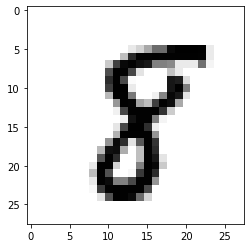

In [27]:
# Print what's in a row
plt.imshow(X_train.iloc[7].values.reshape(28,28),cmap=plt.cm.binary)
plt.show()

In [77]:
#Scale values
scaler = StandardScaler()
Xtrain_scaled_data = scaler.fit_transform(X_train)
Xtest_scaled_data = scaler.fit_transform(X_test)
Kaggle_test = scaler.fit_transform(testKaggle)

In [91]:
# Building Architecture
# 2 Hidden Layers #10 nodes per inner layer
model1 = keras.Sequential([
  #  keras.layers.Flatten(input_shape=(28,28)), #Flatten input
    keras.layers.Dense(10,activation="relu"), # Fully connected hidden layer
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="softmax") # Classification Layer
])
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [92]:
# Fit and Evaluate
model1.fit(Xtrain_scaled_data,y_train,epochs=4)
test_loss, test_acc = model1.evaluate(Xtest_scaled_data, y_test)
print("Test ACC:", test_acc)

Epoch 1/4
919/919 [==============================] - 2s 2ms/step - loss: 1.1305 - accuracy: 0.6453
Epoch 2/4
919/919 [==============================] - 2s 2ms/step - loss: 0.3174 - accuracy: 0.9090
Epoch 3/4
919/919 [==============================] - 2s 2ms/step - loss: 0.2549 - accuracy: 0.9273
Epoch 4/4
394/394 [==============================] - 1s 1ms/step - loss: 0.2642 - accuracy: 0.9237
Test ACC: 0.9236508011817932


In [93]:
#Kaggle Predictions
Kaggleprediction = model1.predict(Kaggle_test.reshape(28000,784))
df = []
for i in range(len(Kaggle_test)):
    df.append(class_names[np.argmax(Kaggleprediction[i])])

pd.DataFrame(df).to_csv('model1.csv')

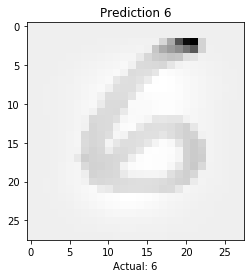

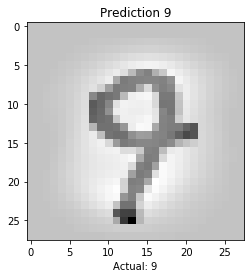

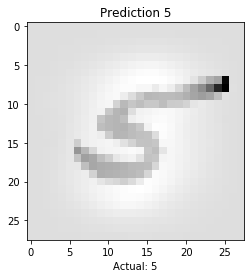

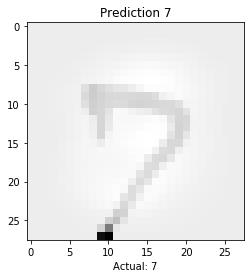

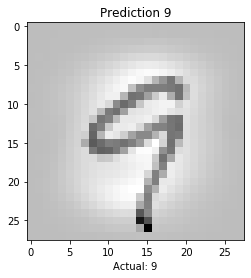

In [67]:
# Making Predictions & Show results
prediction = model.predict(Xtest_scaled_data.reshape(12600,784))

for i in range(5):
    plt.grid(False)
    plt.imshow(Xtest_scaled_data[i].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[y_test.iloc[i]])
    plt.title("Prediction " + class_names[np.argmax(prediction[i])])
    plt.show()

In [94]:
# Building Architecture
# 2 Hidden Layers #20 nodes per inner layer
model2 = keras.Sequential([
  #  keras.layers.Flatten(input_shape=(28,28)), #Flatten input
    keras.layers.Dense(20,activation="relu"), # Fully connected hidden layer
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(10,activation="softmax") # Classification Layer
])
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [95]:
#Fit evaluate
model2.fit(Xtrain_scaled_data,y_train,epochs=4)
test_loss, test_acc = model2.evaluate(Xtest_scaled_data, y_test)
print("Test ACC:", test_acc)

Epoch 1/4
919/919 [==============================] - 2s 2ms/step - loss: 0.8751 - accuracy: 0.7310
Epoch 2/4
919/919 [==============================] - 2s 2ms/step - loss: 0.2167 - accuracy: 0.9347
Epoch 3/4
919/919 [==============================] - 2s 2ms/step - loss: 0.1586 - accuracy: 0.9526
Epoch 4/4
394/394 [==============================] - 1s 1ms/step - loss: 0.2063 - accuracy: 0.9415
Test ACC: 0.9415079355239868


In [96]:
#Kaggle Predictions
Kaggleprediction = model2.predict(Kaggle_test.reshape(28000,784))
df = []
for i in range(len(Kaggle_test)):
    df.append(class_names[np.argmax(Kaggleprediction[i])])

pd.DataFrame(df).to_csv('model2.csv')

In [98]:
# Building Architecture
# 5 Hidden Layers #20 nodes per inner layer
model3 = keras.Sequential([
  #  keras.layers.Flatten(input_shape=(28,28)), #Flatten input
    keras.layers.Dense(20,activation="relu"), # Fully connected hidden layer
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(10,activation="softmax") # Classification Layer
])
model3.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [99]:
#Fit and evaluate
model3.fit(Xtrain_scaled_data,y_train,epochs=4)
test_loss, test_acc = model3.evaluate(Xtest_scaled_data, y_test)
print("Test ACC:", test_acc)

Epoch 1/4
919/919 [==============================] - 3s 2ms/step - loss: 0.9913 - accuracy: 0.6704
Epoch 2/4
919/919 [==============================] - 2s 2ms/step - loss: 0.2580 - accuracy: 0.9232
Epoch 3/4
919/919 [==============================] - 2s 2ms/step - loss: 0.1898 - accuracy: 0.9430
Epoch 4/4
394/394 [==============================] - 1s 1ms/step - loss: 0.2272 - accuracy: 0.9357
Test ACC: 0.9357143044471741


In [100]:
#Kaggle Predictions
Kaggleprediction = model3.predict(Kaggle_test.reshape(28000,784))
df = []
for i in range(len(Kaggle_test)):
    df.append(class_names[np.argmax(Kaggleprediction[i])])

pd.DataFrame(df).to_csv('model3.csv')

In [101]:
# Building Architecture
# 5 Hidden Layers #10 nodes per inner layer
model4 = keras.Sequential([
  #  keras.layers.Flatten(input_shape=(28,28)), #Flatten input
    keras.layers.Dense(10,activation="relu"), # Fully connected hidden layer
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="softmax") # Classification Layer
])
model4.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [102]:
# Fit and Evaluate
model4.fit(Xtrain_scaled_data,y_train,epochs=4)
test_loss, test_acc = model4.evaluate(Xtest_scaled_data, y_test)
print("Test ACC:", test_acc)

Epoch 1/4
919/919 [==============================] - 3s 2ms/step - loss: 1.4210 - accuracy: 0.4800
Epoch 2/4
919/919 [==============================] - 2s 2ms/step - loss: 0.4074 - accuracy: 0.8831
Epoch 3/4
919/919 [==============================] - 2s 2ms/step - loss: 0.3389 - accuracy: 0.9038
Epoch 4/4
394/394 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.9071
Test ACC: 0.9070634841918945


In [103]:
#Kaggle Predictions
Kaggleprediction = model4.predict(Kaggle_test.reshape(28000,784))
df = []
for i in range(len(Kaggle_test)):
    df.append(class_names[np.argmax(Kaggleprediction[i])])

pd.DataFrame(df).to_csv('model4.csv')